--------------------------------------------------------------------------------
# **Mineração de dados - 2021.1 - GRP08 PMPE - ENTREGA FINAL (TREINAMENTO E EXPERIMENTO)** 
--------------------------------------------------------------------------------
Entrega final do projeto da disciplina de Mineração de Dados 2021.1 - GRP08 PMPE.

Neste notebook foram realizadas as etapas de treinamento e avaliação dos classificadores:

- Random Forest
- KNN
- Naive Bayes

Alunos: Ailton de Souza Leite, André Luiz da Silva Xavier, Igor Vitor Teixeira, Rubens Karman Paula da Silva

Link do Classroom: [clique aqui](https://classroom.google.com/c/MjY2OTc1MjE3NDUy/a/MzA2NTU5MDAxOTM1/details).

In [ ]:
#@title **1. Carregamento da base pré-processada**
#@markdown Indique a localização no google drive.

caminho_dados_pre_processados = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/dados/11052021consumo_pre_processado_2021-1.csv'  #@param {type: "string"}

################################################################################
# Importando bibliotecas para uso na aplicação
################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle

################################################################################
# Montando o drive do google para recuperar as bases
################################################################################
from google.colab import drive
drive.mount('/content/drive', True)

################################################################################
# Recuperando as bases de dados
################################################################################
#Realizando a leitura do arquivo de dados
print(f'Carregando o arquivo: {caminho_dados_pre_processados}')
dados = pd.read_csv(caminho_dados_pre_processados, sep=';', low_memory=False)

print(f'Formato da base: {dados.shape[0]} linhas e {dados.shape[1]} colunas identificadas.')
dados.head()
#@markdown ---

Mounted at /content/drive
Carregando o arquivo: /content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/dados/11052021consumo_pre_processado_2021-1.csv
Formato da base: 698678 linhas e 21 colunas identificadas.


,Unnamed: 0,AUTORIZACAO,HODOMETRO,CONDUTOR,NOME_FANTASIA,CIDADE,UF,SERVICO,QUANTIDADE,UNITARIO,VALOR,DATAHORA_TRANS,VEICULO,TIPO_VEICULO,MODELO_VEICULO,DESLOCAMENTO,CONSUMO,CENTRO_DE_CUSTO,AREA,MARCA,ROTULO
0,15,49205258,52579.0,1258,POSTO JP,TRINDADE,PE,Gasolina,"9,25","4,08","37,75",26/01/2017,4811.0,MOTOCICLETA,XRE 300,42750,24.00,19,INTERIOR,NaN,0
1,16,49019161,51864.0,4143,POSTO JP,TRINDADE,PE,Gasolina,"9,51",4,"38,05",14/01/2017,4811.0,MOTOCICLETA,XRE 300,42035,24.08,19,INTERIOR,NaN,0
2,17,49071596,48596.0,6914,POSTO CENTRAL M GRANJA,PARNAMIRIM,PE,Gasolina,"8,19","3,79","31,03",17/01/2017,4812.0,MOTOCICLETA,XRE 300,43418,23.57,6,INTERIOR,NaN,0
3,20,49088750,62164.0,13420,AUTO POSTO OLIVEIRA,SANTA CRUZ DO CAPIBARIBE,PE,Gasolina,"6,75","3,73","25,17",18/01/2017,2774.0,MOTOCICLETA,XRE 300,55438,23.41,35,INTERIOR,NaN,0
4,22,48949731,21835.0,56,POSTO LIMARQUES,CABROBO,PE,Gasolina,"5,86","4,06","23,79",10/01/2017,2759.0,MOTOCICLETA,XRE 300,21834,20.48,15,INTERIOR,NaN,0


In [ ]:
#@title **2. Reduzindo as dimensões e codificando os valores categórios**
#@markdown Mantendo apenas os atributos necessários para o treinamento dos modelos.

from sklearn.preprocessing import LabelEncoder

atributos_selecionadas = ['MODELO_VEICULO', 'AREA', 'CONSUMO', 'ROTULO']

print(f'Iniciando a redução de dimensões, mantendo apenas os seguintes atributos: {atributos_selecionadas}')
dados = dados.drop([col for col in dados.columns if col not in atributos_selecionadas], axis=1)

atributos_para_codificacao = ['MODELO_VEICULO', 'AREA']
print(f'Iniciando a codificação dos seguintes atributos: {atributos_para_codificacao}')
labelencoder = LabelEncoder()

for att in atributos_para_codificacao:
  dados[att] = labelencoder.fit_transform(dados[att])
  
dados = dados[dados['ROTULO'] != 3]
dados.loc[dados['ROTULO'] == 2] = 1

dados.head()

Iniciando a redução de dimensões, mantendo apenas os seguintes atributos: ['MODELO_VEICULO', 'AREA', 'CONSUMO', 'ROTULO']
Iniciando a codificação dos seguintes atributos: ['MODELO_VEICULO', 'AREA']


,MODELO_VEICULO,CONSUMO,AREA,ROTULO
0,4,24.00,1,0
1,4,24.08,1,0
2,4,23.57,1,0
3,4,23.41,1,0
4,4,20.48,1,0


In [ ]:
#@title **3. Separação da base em treinamento e testes**
#@markdown Separação da base em treinamento (70%) e testes (30%).

X_array = np.array(dados.drop('ROTULO', axis=1))
y_array = np.array(dados['ROTULO'])

X_train_array, X_test_array, y_train_array, y_test_array = train_test_split(X_array, y_array, test_size=0.3, random_state=5)

print(f'Treinamento: {y_train_array.size} linhas')
print(f'Teste: {y_test_array.size} linhas')

Treinamento: 472155 linhas
Teste: 202353 linhas


In [ ]:
#@title **4. Método para imprimir os resultados**
#@markdown Declaração do método responsável por imprimir os resultados.

import itertools as it
from sklearn.metrics import confusion_matrix

def imprimir_metricas(y_array, y_pred, nome_classificador):
  acuracia = accuracy_score(y_test_array, y_pred)
  sensibilidade_conforme, sensibilidade_nao_conforme = recall_score(y_test_array, y_pred, average=None).ravel()
  precisao_conforme, precisao_nao_conforme = precision_score(y_test_array, y_pred, average=None).ravel()

  print(f'\n>>>>> Resultados - {nome_classificador} <<<<<')
  print(f'Acurácia: {acuracia}')
  print(f'Sensibilidade: {sensibilidade_conforme} e {sensibilidade_nao_conforme}')
  print(f'Precisão: {precisao_conforme} e {precisao_nao_conforme}')

  print('\n>>>>> Matriz de confusão <<<<<\n')
  matriz_confusao = confusion_matrix(y_test_array, y_pred)
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
  plt.show()

print("Método 'imprimir_metricas' declarado!")
#@markdown ---

Método 'imprimir_metricas' declarado!


Parâmetros utilizados no GridSearch: {'n_estimators': [100, 150], 'criterion': ('gini', 'entropy')}
>>>>> GridSearch + Treinando - Iniciando <<<<<
Melhores parâmetros: {'criterion': 'gini', 'n_estimators': 100}
>>>>> GridSearch + Treinando - Finalizado <<<<<
>>>>> Avaliação - Iniciando <<<<<

>>>>> Resultados - RandomForestClassifier <<<<<
Acurácia: 0.9999901162819429
Sensibilidade: 0.999988755263942 e 1.0
Precisão: 1.0 e 0.9999183473503716

>>>>> Matriz de confusão <<<<<



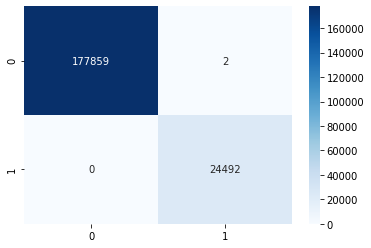

>>>>> Avaliação - Finalizado <<<<<
>>>>> Salvando o modelo treinado - Iniciando <<<<<
>>>>> Salvando o modelo treinado - Finalizado <<<<<


In [ ]:
#@title **5. RandomForestClassifier (GridSearch + Treinamento + Avaliação)**

from sklearn.ensemble import RandomForestClassifier

parameters_rf = {'n_estimators': [100, 150], 'criterion': ('gini', 'entropy')}

print(f'Parâmetros utilizados no GridSearch: {parameters_rf}')

print('>>>>> GridSearch + Treinando - Iniciando <<<<<')
clf_rf = GridSearchCV(RandomForestClassifier(), parameters_rf)
clf_rf.fit(X_train_array, y_train_array)
print(f'Melhores parâmetros: {clf_rf.best_params_}')
print('>>>>> GridSearch + Treinando - Finalizado <<<<<')

print('>>>>> Avaliação - Iniciando <<<<<')
y_pred_rf = clf_rf.predict(X_test_array)
imprimir_metricas(y_test_array, y_pred_rf, 'RandomForestClassifier')
print('>>>>> Avaliação - Finalizado <<<<<')

print('>>>>> Salvando o modelo treinado - Iniciando <<<<<')
caminho_modelo_random_forest = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/modelos_treinados/random_forest.sav'  #@param {type: "string"}
pickle.dump(clf_rf, open(caminho_modelo_random_forest, 'wb'))
print('>>>>> Salvando o modelo treinado - Finalizado <<<<<')

#@markdown ---

Parâmetros utilizados no GridSearch: {'n_neighbors': [5, 10], 'algorithm': ('auto', 'ball_tree')}
>>>>> GridSearch + Treinando - Iniciando <<<<<
Melhores parâmetros: {'algorithm': 'auto', 'n_neighbors': 5}
>>>>> GridSearch + Treinando - Finalizado <<<<<
>>>>> Avaliação - Iniciando <<<<<

>>>>> Resultados - KNeighborsClassifier <<<<<
Acurácia: 0.9999950581409714
Sensibilidade: 0.9999943776319711 e 1.0
Precisão: 1.0 e 0.999959172008329

>>>>> Matriz de confusão <<<<<



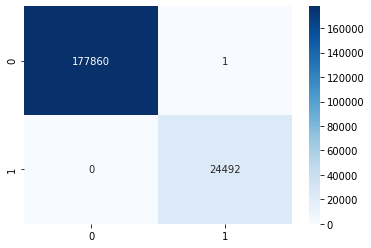

>>>>> Avaliação - Finalizado <<<<<
>>>>> Salvando o modelo treinado - Iniciando <<<<<
>>>>> Salvando o modelo treinado - Finalizado <<<<<


In [ ]:
#@title **6. KNeighborsClassifier (GridSearch + Treinamento + Avaliação)**

from sklearn.neighbors import KNeighborsClassifier

parameters_knn = {'n_neighbors': [5, 10], 'algorithm': ('auto', 'ball_tree')}

print(f'Parâmetros utilizados no GridSearch: {parameters_knn}')

print('>>>>> GridSearch + Treinando - Iniciando <<<<<')
clf_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn)
clf_knn.fit(X_train_array, y_train_array)
print(f'Melhores parâmetros: {clf_knn.best_params_}')
print('>>>>> GridSearch + Treinando - Finalizado <<<<<')

print('>>>>> Avaliação - Iniciando <<<<<')
y_pred_knn = clf_knn.predict(X_test_array)
imprimir_metricas(y_test_array, y_pred_knn, 'KNeighborsClassifier')
print('>>>>> Avaliação - Finalizado <<<<<')

print('>>>>> Salvando o modelo treinado - Iniciando <<<<<')
caminho_modelo_knn = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/modelos_treinados/knn.sav'  #@param {type: "string"}
pickle.dump(clf_knn, open(caminho_modelo_knn, 'wb'))
print('>>>>> Salvando o modelo treinado - Finalizado <<<<<')

#@markdown ---

>>>>> Treinando o GaussianNB <<<<<
>>>>> Treinando concluído com sucesso <<<<<
>>>>> Avaliação - Iniciando <<<<<

>>>>> Resultados - GaussianNB <<<<<
Acurácia: 0.9468898410203951
Sensibilidade: 1.0 e 0.5612036583374163
Precisão: 0.9430193841194435 e 1.0

>>>>> Matriz de confusão <<<<<



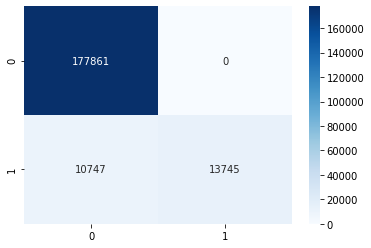

>>>>> Avaliação - Finalizado <<<<<
>>>>> Salvando o modelo treinado - Iniciando <<<<<
>>>>> Salvando o modelo treinado - Finalizado <<<<<


In [ ]:
#@title **7. Naive Bayes GaussianNB - (Treinamento + Avaliação)**
#@markdown Treinamento e testes do **GaussianNB**.

from sklearn.naive_bayes import GaussianNB

print('>>>>> Treinando o GaussianNB <<<<<')
clf_naive = GaussianNB()
clf_naive.fit(X_train_array, y_train_array)
print('>>>>> Treinando concluído com sucesso <<<<<')

print('>>>>> Avaliação - Iniciando <<<<<')
y_pred_naive = clf_naive.predict(X_test_array)
imprimir_metricas(y_test_array, y_pred_naive, 'GaussianNB')
print('>>>>> Avaliação - Finalizado <<<<<')

print('>>>>> Salvando o modelo treinado - Iniciando <<<<<')
caminho_modelo_naive = '/content/drive/Shareddrives/Projeto SAA MD 2021.1/ENTREGA_FINAL_MD_2021/modelos_treinados/naive.sav'  #@param {type: "string"}
pickle.dump(clf_naive, open(caminho_modelo_naive, 'wb'))
print('>>>>> Salvando o modelo treinado - Finalizado <<<<<')

#@markdown ---

In [ ]:
#@title **8. Visualização dos gráficos comparativos - Acurácia**
#@markdown Plot de gráfico de barras comparando a acurácia dos modelos.

plt.figure(figsize=(7,4))

print('>>>>> Comparando a acurácia <<<<<')
acuracia_rf = accuracy_score(y_test_array, y_pred_rf)
acuracia_knn = accuracy_score(y_test_array, y_pred_knn)
acuracia_naive = accuracy_score(y_test_array, y_pred_naive)

acc_df = pd.DataFrame(data={'Classificador': ['Random Forest', 'KNN', 'Naive Bayes'], 'Acurácia': [acuracia_rf, acuracia_knn, acuracia_naive]})
sns.barplot(x='Classificador', y='Acurácia', data=acc_df)
plt.show()

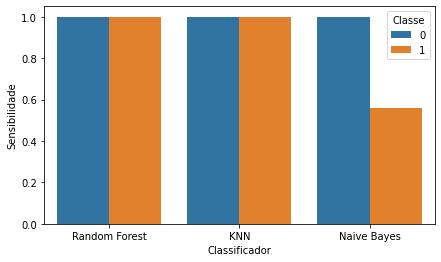

In [ ]:
#@title **9. Visualização dos gráficos comparativos - Sensibilidade**
#@markdown Plot de gráfico de barras comparando a sensibilidade dos modelos.

plt.figure(figsize=(7,4))

print('>>>>> Comparando a sensibilidade <<<<<')
sensibilidade_conforme_rf, sensibilidade_nao_conforme_rf = recall_score(y_test_array, y_pred_rf, average=None).ravel()
sensibilidade_conforme_knn, sensibilidade_nao_conforme_knn = recall_score(y_test_array, y_pred_knn, average=None).ravel()
sensibilidade_conforme_naive, sensibilidade_nao_conforme_naive = recall_score(y_test_array, y_pred_naive, average=None).ravel()

sensibilidade_df = pd.DataFrame(data={'Classificador': ['Random Forest', 'Random Forest', 'KNN', 'KNN', 'Naive Bayes', 'Naive Bayes'], 'Sensibilidade': [sensibilidade_conforme_rf, sensibilidade_nao_conforme_rf, sensibilidade_conforme_knn, sensibilidade_nao_conforme_knn, sensibilidade_conforme_naive, sensibilidade_nao_conforme_naive], 'Classe': [0, 1, 0, 1, 0, 1]})
plt.figure(figsize=(7,4))
sns.barplot(x='Classificador', y='Sensibilidade', hue='Classe', data=sensibilidade_df)

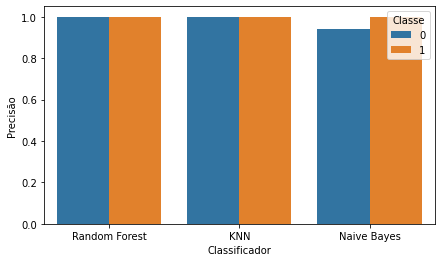

In [ ]:
#@title **10. Visualização dos gráficos comparativos - Precisão**
#@markdown Plot de gráfico de barras comparando a precisão dos modelos.

plt.figure(figsize=(7,4))

print('>>>>> Comparando a precisão <<<<<')
precisao_conforme_rf, precisao_nao_conforme_rf = precision_score(y_test_array, y_pred_rf, average=None).ravel()
precisao_conforme_knn, precisao_nao_conforme_knn = precision_score(y_test_array, y_pred_knn, average=None).ravel()
precisao_conforme_naive, precisao_nao_conforme_naive = precision_score(y_test_array, y_pred_naive, average=None).ravel()

precisao_df = pd.DataFrame(data={'Classificador': ['Random Forest', 'Random Forest', 'KNN', 'KNN', 'Naive Bayes', 'Naive Bayes'], 'Precisão': [precisao_conforme_rf, precisao_nao_conforme_rf, precisao_conforme_knn, precisao_nao_conforme_knn, precisao_conforme_naive, precisao_nao_conforme_naive], 'Classe': [0, 1, 0, 1, 0, 1]})
plt.figure(figsize=(7,4))
sns.barplot(x='Classificador', y='Precisão', hue='Classe', data=precisao_df)